In [25]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import pandas as pd
import seaborn as sns
from matplotlib.lines import Line2D

In [5]:
!wget https://raw.githubusercontent.com/rsautter/Zeta-Space/main/results/zLorenz.csv 
!wget https://raw.githubusercontent.com/rsautter/Zeta-Space/main/results/zRed.csv
!wget https://raw.githubusercontent.com/rsautter/Zeta-Space/main/results/zExo.csv
!wget https://raw.githubusercontent.com/rsautter/Zeta-Space/main/results/zEndo.csv

--2022-12-02 14:40:16--  https://raw.githubusercontent.com/rsautter/Zeta-Space/main/results/zLorenz.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25191 (25K) [text/plain]
Saving to: ‘zLorenz.csv’

zLorenz.csv         100%[===================>]  24.60K  --.-KB/s    in 0.002s  

2022-12-02 14:40:16 (14.5 MB/s) - ‘zLorenz.csv’ saved [25191/25191]

--2022-12-02 14:40:16--  https://raw.githubusercontent.com/rsautter/Zeta-Space/main/results/zRed.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8590 (8.4K) [text/plain]
Saving to

In [7]:
endo = pd.read_csv("zEndo.csv")
exo =  pd.read_csv("zExo.csv")
reds =  pd.read_csv("zRed.csv")
zL =  pd.read_csv("zLorenz.csv")

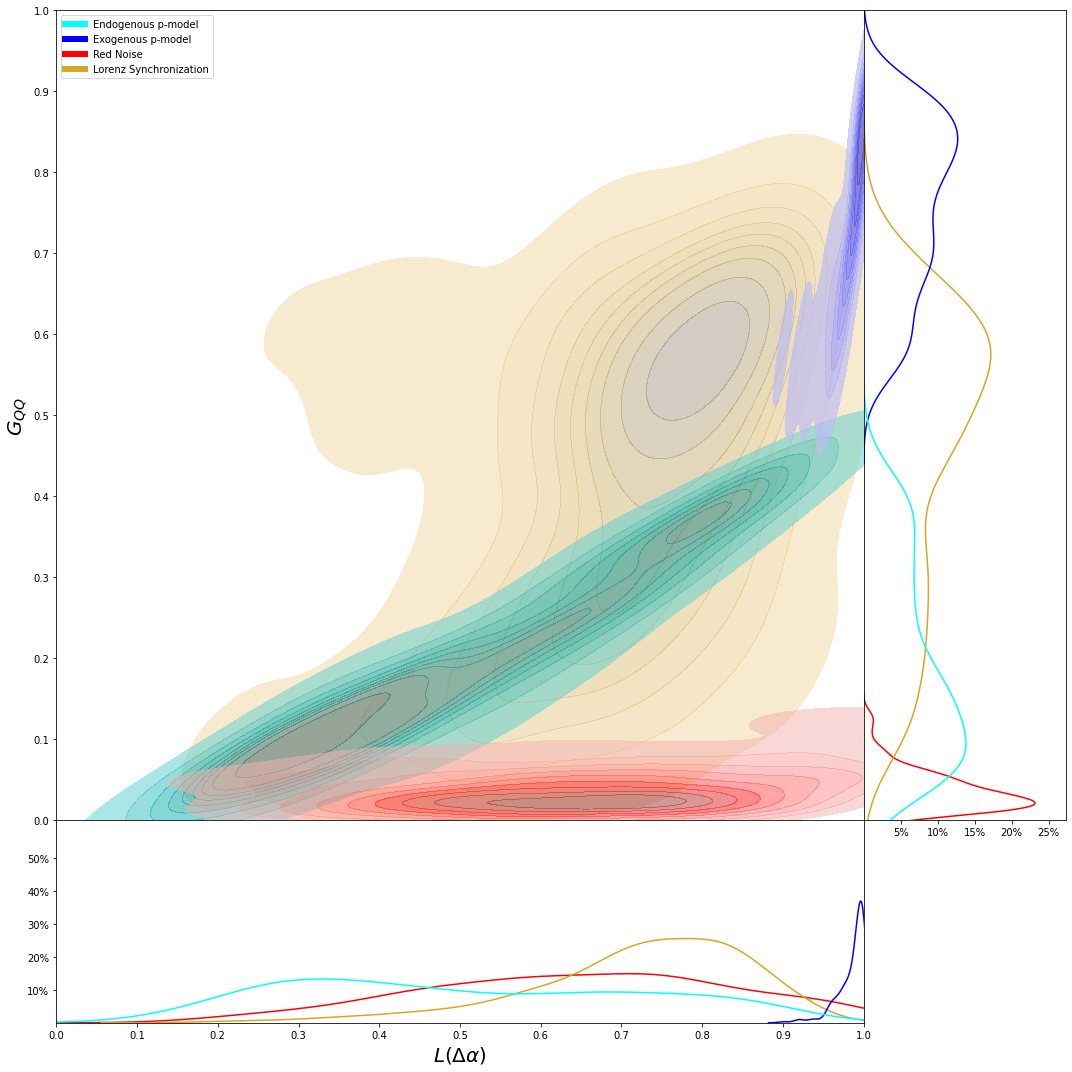

In [91]:

gs = GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[4, 1],wspace=0,hspace=0)

plt.figure(figsize=(15,15))

plt.subplot(gs[0,0])
sns.kdeplot(data=zL, x="LDA", y="GQQ",fill=True,color='goldenrod',thresh=0.02,alpha = 0.3)
#plt.scatter(zL["LDA"],zL["GQQ"])
sns.kdeplot(data=endo, x="LDA", y="GQQ",fill=True,color='cyan',thresh=0.05,alpha = 0.5)
sns.kdeplot(data=exo, x="LDA", y="GQQ",fill=True,color='blue',thresh=0.005,alpha = 0.7)
sns.kdeplot(data=reds, x="LDA", y="GQQ",fill=True,color='red',thresh=0.05,alpha = 0.5)

#wn = plt.scatter(0.0,0.0,s=200,color='k')

plt.xlim(0.0,1.0)
plt.ylim(0.0,1.0)
handles = [Line2D([0], [0], color='cyan', lw=6),
                Line2D([0], [0], color='blue', lw=6),
                Line2D([0], [0], color='red', lw=6),
                Line2D([0], [0], color='goldenrod', lw=6)
                ]
plt.legend(handles,['Endogenous p-model','Exogenous p-model','Red Noise','Lorenz Synchronization'],loc=2)
plt.xlabel('')
plt.xticks([])
plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.ylabel(r"$G_{QQ}$",fontsize=20)


plt.subplot(gs[0,1])
ax = sns.histplot(reds,color='red',fill=False,y='GQQ',lw=2.5,bins=10,stat="percent",kde=True,kde_kws={'cut': 3})
ax.containers[0].remove()
ax = sns.histplot(zL,color='goldenrod',fill=False,y='GQQ',lw=2.5,bins=10,stat="percent",kde=True,kde_kws={'cut': 3})
ax.containers[0].remove()
ax = sns.histplot(exo,color='blue',fill=False,y='GQQ',lw=2.5,bins=10,stat="percent",kde=True,kde_kws={'cut': 3})
ax.containers[0].remove()
ax = sns.histplot(endo,color='cyan',fill=False,y='GQQ',lw=2.5,bins=10,stat="percent",kde=True,kde_kws={'cut': 3})
ax.containers[0].remove()

plt.ylim(0,1)
plt.yticks([])
plt.ylabel('')
plt.xticks([5,10,15,20,25],["5%","10%","15%","20%","25%"])
plt.xlabel('')


plt.subplot(gs[1,0])
ax = sns.histplot(reds,color='red',fill=False,x='LDA',lw=2.5,bins=10,stat="percent",kde=True,kde_kws={'cut': 3})
ax.containers[0].remove()
ax = sns.histplot(zL,color='goldenrod',fill=False,x='LDA',lw=2.5,bins=10,stat="percent",kde=True,kde_kws={'cut': 3})
ax.containers[0].remove()
ax = sns.histplot(exo,color='blue',fill=False,x='LDA',lw=2.5,bins=10,stat="percent",kde=True,kde_kws={'cut': 3})
ax.containers[0].remove()
ax = sns.histplot(endo,color='cyan',fill=False,x='LDA',lw=2.5,bins=10,stat="percent",kde=True,kde_kws={'cut': 3})
ax.containers[0].remove()

plt.xlim(0,1)
plt.yticks([10,20,30,40,50],["10%","20%","30%","40%","50%"])
plt.xticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.ylabel('')
plt.xlabel(r"$L(\Delta \alpha)$",fontsize=20)
plt.tight_layout()
plt.savefig("Zeta.png",dpi=400)

plt.show()